# EDA GDP PROJECTION IMF April 2025

## A Critical Juncture amid Policy Shifts

In [33]:
from pathlib import Path
import win32com.client as win32
    
def convert_xls_to_xlsx(path: Path) -> None:
    excel = win32.gencache.EnsureDispatch('Excel.Application')
    wb = excel.Workbooks.Open(path.absolute())

    # FileFormat=51 is for .xlsx extension
    wb.SaveAs(str(path.absolute().with_suffix(".xlsx")), FileFormat=51)
    wb.Close()
    excel.Application.Quit()

In [ ]:
from pathlib import Path
import win32com.client as win32
import pandas as pd

def convert_xls_to_xlsx(path: Path) -> None:
    excel = win32.gencache.EnsureDispatch('Excel.Application')
    wb = excel.Workbooks.Open(str(path.absolute()))
    
    # Save the file as .xlsx (FileFormat=51 corresponds to .xlsx)
    wb.SaveAs(str(path.absolute().with_suffix(".xlsx")), FileFormat=51)
    
    # Close the workbook and quit Excel
    wb.Close()
    excel.Application.Quit()

def read_xlsx_as_df(path: Path) -> pd.DataFrame:
    # Read the converted .xlsx file into a DataFrame
    return pd.read_excel(path)

# Example Usage
xls_file = Path(r'C:\Users\fd92u\Downloads\WEO_Data.xls')
convert_xls_to_xlsx(xls_file)



### LOAD  DATA

In [133]:
xls_file = Path(r'C:\Users\fd92u\Downloads\WEO_Data.xls')
# After conversion, read the new .xlsx file
xlsx_file = xls_file.with_suffix(".xlsx")
df = read_xlsx_as_df(xlsx_file)


In [134]:
df

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,Estimates Start After
0,Afghanistan,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,NaN,NaN,NaN,...,-6.240,2.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
1,Albania,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",2.684,5.7,2.900,1.100,2.000,...,4.827,3.937,3.962,3.788,3.468,3.501,3.466,3.483,3.482,2022.0
2,Algeria,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",-5.4,3,6.400,5.400,5.600,...,3.636,4.100,3.536,3.496,3.004,2.803,2.794,2.404,2.401,2023.0
3,Andorra,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,NaN,NaN,NaN,...,9.565,2.584,3.373,1.900,1.6,1.500,1.500,1.500,1.500,2024.0
4,Angola,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",2.406,-4.4,0.000,4.200,6.000,...,4.220,1.001,4.503,2.374,2.076,2.521,2.879,2.982,3.087,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Yemen,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,NaN,NaN,NaN,...,1.500,-2.000,-1.500,-1.500,0,6.000,5.500,5.000,5.000,2022.0
194,Zambia,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",3.854,6.631,-2.912,-1.145,-1.718,...,5.211,5.368,4.043,6.200,6.817,6.402,5.152,4.836,4.760,2022.0
195,Zimbabwe,"Gross domestic product, constant prices",Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,NaN,NaN,NaN,...,6.139,5.337,2.027,6.022,4.64,3.630,3.458,3.532,3.532,2023.0
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Transform

## 🔄 Transform Step in an ELT Pipeline

In an **ELT (Extract, Load, Transform)** pipeline, the **Transform** phase plays a critical role in turning raw data into meaningful, analysis-ready datasets. Unlike traditional ETL (Extract, Transform, Load), in ELT the raw data is first loaded into a centralized storage system (like a data warehouse or data lake), and then transformations are performed **within** that system.

---

### ✅ Purpose of the Transform Step

The **Transform** step is designed to:

- ✅ **Clean** the data (remove duplicates, handle nulls, fix formatting)
- ✅ **Normalize** structures (reshape tables, pivot/unpivot, enforce schemas)
- ✅ **Enrich** the dataset (add calculated fields, join with external sources)
- ✅ **Aggregate** or summarize metrics (e.g., total sales per month)
- ✅ **Prepare data for analytics** (match reporting or machine learning needs)

---

### ⚙️ Common Transformation Tasks

Here are typical operations performed during transformation:

| Task                      | Description                                                        |
|---------------------------|--------------------------------------------------------------------|
| Data type casting         | Convert strings to integers, dates, floats, etc.                   |
| Filtering & cleansing     | Remove invalid records, fill or drop missing values                |
| Joins & merges            | Combine data from multiple sources or tables                       |
| Column renaming           | Improve naming consistency and readability                         |
| Aggregation               | Group and summarize data (e.g., avg. GDP by country & year)        |
| Business logic mapping    | Apply company-specific rules (e.g., "high revenue" thresholds)     |
| Normalization/Denormalization | Flatten nested structures or create relational tables         |

---

### 🧠 Where Transformation Happens

In modern ELT workflows, transformation is usually done:

- Inside a **cloud data warehouse** (e.g., BigQuery, Snowflake, Redshift) using SQL
- With **Python or R scripts** for complex logic
- With **dbt (Data Build Tool)** for version-controlled, modular SQL-based pipelines

---




## 📓 Using Jupyter Notebook to Understand the Data and Plan Transformations

Before transforming data in an ELT pipeline, it’s essential to **understand the structure, content, and quality** of your dataset. **Jupyter Notebook** is a powerful tool for this exploration phase. It allows you to interactively load, inspect, visualize, and test transformation logic on your data.

---

### 🔍 Why Use Jupyter Notebook for Data Understanding?

Jupyter Notebooks provide:

- 🧪 **Interactive experimentation** with immediate feedback
- 📊 **Rich visualizations** to spot trends and anomalies
- 📝 **Documentation alongside code** to record your insights
- 📌 A clear environment to **plan and prototype transformation logic**

---

### 🛠️ Typical Steps in Data Exploration

Here’s how Jupyter Notebook helps in planning transformations:

#### 1. **Load and Preview the Dataset**
```python
import pandas as pd

df = pd.read_csv("gdp_growth_data.csv")
df.head()


## Explanation of DataFrame Transformation

This code reshapes and cleans the raw IMF WEO data for easier analysis.

- The .melt() function reshapes the DataFrame from wide format to long format.

- All columns except those listed in id_vars are melted into two columns: one for the Year, and another for the associated Value.

- Each row now represents a unique combination of country, indicator, and year — which makes it ideal for time series analysis or plotting.



### 1. Melt the DataFrame

```python
df_melted = df.melt(
    id_vars=['Country', 'Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'],
    var_name='Year',
    value_name='Value'
)


In [143]:
# Melt the DataFrame
df_melted = df.melt(
    id_vars=['Country', 'Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'],
    var_name='Year',
    value_name='Value'
)

# Convert 'Year' to integer type
df_melted['Year'] = df_melted['Year'].astype(int)

# Convert 'Value' to numeric (with coercion for errors)
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

In [144]:
from functions import data_overview, variables_overview

In [145]:
data_overview(df_melted, "Data_Overview")   

,Data_Overview
Columns,8.00
Rows,10098.00
Missing_Values,1002.00
Missing_Values %,9.92
Duplicates,0.00
Duplicates %,0.00
Categorical_variables,1.00
Boolean_variables,4.00
Numerical_variables,2.00


In [146]:
variables_overview(typed_df)

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
country,198,object,0,0.000000,True,True
estimates_start_after,8,float64,102,1.010101,True,True
year,51,int32,0,0.000000,False,True
value,6314,float64,1002,9.922757,True,True


## 🧹 Standardizing Column Names

To ensure consistency throughout the data pipeline, it’s good practice to **standardize column names** — especially when working with multiple datasets or when feeding data into transformation scripts and analytics tools.

- Prevents case sensitivity issues when referencing column names later ('Country' vs 'country').

- Helps maintain naming consistency when combining or comparing datasets.

- Makes it easier to apply batch renaming or mapping logic.

- Simplifies integration with tools that expect lowercase column names (e.g., SQL engines, dbt).

```python
df_melted.columns = map(str.lower, df_melted.columns)


In [139]:
#standardize(lowercas) column names and make them consistent
df_melted.columns = map(str.lower, df_melted.columns)

## 🧼 Replacing Spaces and Special Characters in Column Names

To further clean and prepare the dataset for analysis and transformation, we **replace spaces and special characters** in column names with underscores. This helps ensure the dataset is compatible with downstream systems (e.g., SQL, Python scripts, BI tools) that may not handle special characters well.

```python
df_melted.columns = df_melted.columns.str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)


In [140]:
# replace non-alphanumeric characters with underscore
# Replace spaces and special characters in column names with underscores
df_melted.columns = df_melted.columns.str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)

In [141]:
variables_overview_data=variables_overview(df_melted)

## 🔍 Identifying Categorical Variables with Missing Values

To prepare data for transformation and modeling, it's important to understand where missing values occur—especially in categorical variables that may need imputation, encoding, or exclusion.

```python
cat_miss_values = variables_overview_data.loc[
    (variables_overview_data["dtype"] == "object") & 
    (variables_overview_data["null"] > 0)
]


In [142]:
#Categorical Variables with missing values
cat_miss_values = variables_overview_data.loc[(variables_overview_data["dtype"] == "object") & (variables_overview_data["null"] > 0)]
cat_miss_values

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
country,197,object,51,0.505051,True,True
subject_descriptor,1,object,102,1.010101,True,False
units,1,object,102,1.010101,False,False
scale,1,object,102,1.010101,False,False
country_series_specific_notes,1,object,102,1.010101,True,False


## 🔍 Identifying Numerical Variables with Missing Values

Before proceeding with data cleaning and transformation, it's crucial to locate missing values in numerical columns, as they can affect aggregations, statistical analyses, and machine learning models.

```python
num_miss_values = variables_overview_data.loc[
    (variables_overview_data["dtype"] != "object") &
    (variables_overview_data["null"] > 0)
]


In [113]:
#Categorical Variables with missing values
num_miss_values = variables_overview_data.loc[(variables_overview_data["dtype"] != "object") & (variables_overview_data["null"] > 0)]
num_miss_values

,unique,dtype,null,null %,has_non_alphanumeric,has_digits
estimates_start_after,8,float64,102,1.010101,True,True
value,6314,float64,1002,9.922757,True,True


In [114]:
df_melted2 = df_melted.drop(columns=['country_series_specific_notes', 'units', 'scale', 'subject_descriptor'])


# Ensure Correct Data Types

In [148]:
import pandas as pd

class DtypeMapper:
    def __init__(self, dtype_map):
        """
        dtype_map: dict - mapping of column names to desired Python or NumPy dtypes
        Example: {'year': int, 'value': float, 'country': str}
        """
        self.dtype_map = dtype_map

    def apply(self, df):
        df = df.copy()
        for col, dtype in self.dtype_map.items():
            if col in df.columns:
                try:
                    if dtype in [int, float]:
                        df[col] = pd.to_numeric(df[col], errors='coerce')
                    else:
                        df[col] = df[col].astype(dtype)
                except Exception as e:
                    print(f"Error converting column '{col}' to {dtype}: {e}")
        return df


In [158]:
dtype_map = {
    'country': str,
    'estimates_start_after': int,
    'year': int,
    'value': float
}

mapper = DtypeMapper(dtype_map)
typed_df = mapper.apply(df_melted2)

In [160]:
typed_df['estimates_start_after'] = pd.to_numeric(typed_df['estimates_start_after'], errors='coerce').astype('Int64')


In [161]:
typed_df

,country,estimates_start_after,year,value
0,Afghanistan,2024,1980,NaN
1,Albania,2022,1980,2.684
2,Algeria,2023,1980,-5.400
3,Andorra,2024,1980,NaN
4,Angola,2023,1980,2.406
...,...,...,...,...
10093,Yemen,2022,2030,5.000
10094,Zambia,2022,2030,4.760
10095,Zimbabwe,2023,2030,3.532
10096,nan,<NA>,2030,NaN


## Why Use `.copy()` When Filtering DataFrames?

When working with Pandas DataFrames, it's essential to understand the distinction between **views** and **copies**. A **view** refers to a subset of the original DataFrame, while a **copy** is an entirely new object that doesn't link to the original.

In this case, the following code is used to filter the main DataFrame (`typed_df`) to include only G7 countries and data from 2023 onwards:

```python
g7_df1 = typed_df[
    (typed_df['country'].isin(g7_countries)) & 
    (typed_df['year'] >= 2023)
].copy()


In [168]:
# G7 countries
g7_countries = ['United States', 'Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom']



In [166]:
# Filter the main DataFrame to include only G7 countries from 2023 onwards
g7_df1 = typed_df[
    (typed_df['country'].isin(g7_countries)) &  # Keep only rows for G7 countries
    (typed_df['year'] >= 2023)                  # and for year 2023 or later
].copy()  # .copy() to avoid SettingWithCopyWarning


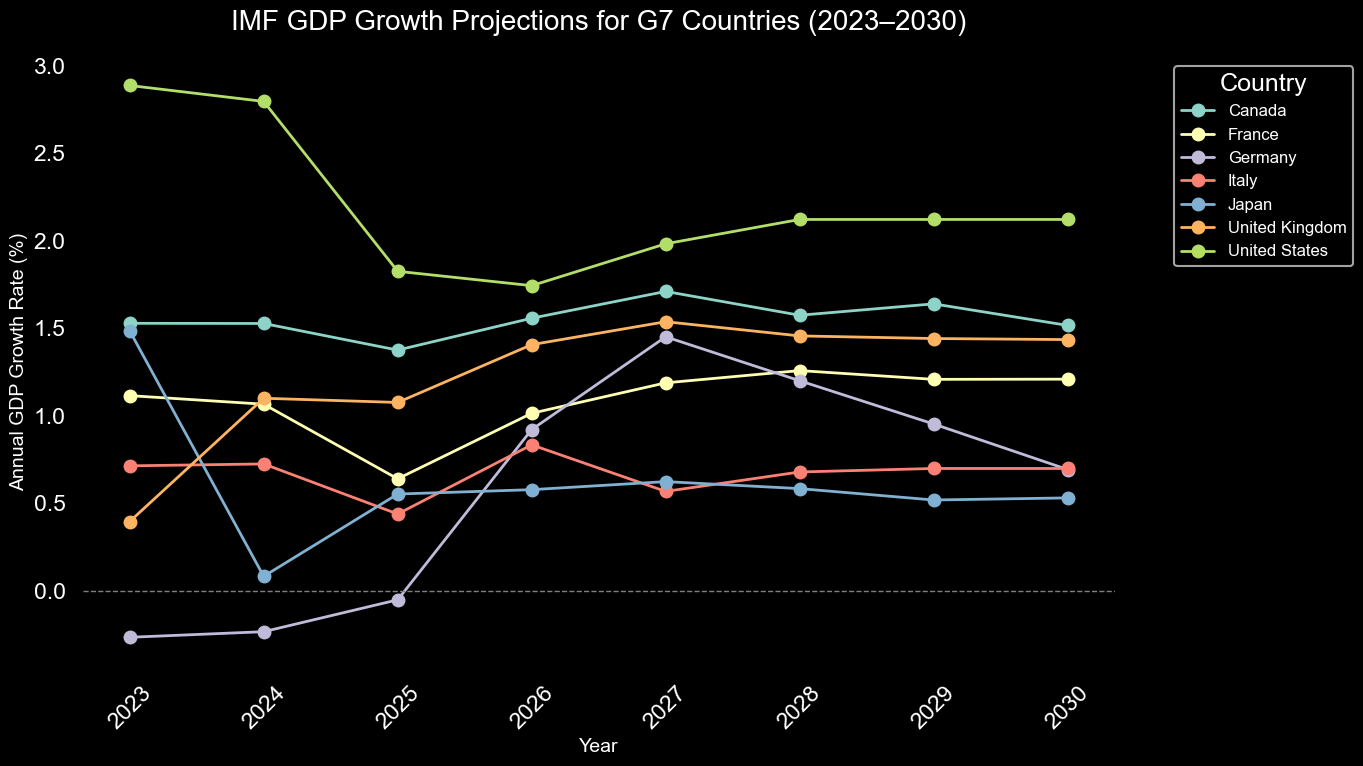

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'value' is numeric
g7_df['value'] = pd.to_numeric(g7_df['value'], errors='coerce')

# Set up the plot with dark background
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each country's GDP growth projection
for country in g7_countries:
    country_data = g7_df[g7_df['country'] == country]
    ax.plot(country_data['year'], country_data['value'], label=country, marker='o', linestyle='-', linewidth=2)

# Titles and labels
ax.set_title('IMF GDP Growth Projections for G7 Countries (2023–2030)', fontsize=20, pad=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annual GDP Growth Rate (%)', fontsize=14)

# Legend
ax.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Rotate x-ticks
ax.set_xticks(g7_df['year'].unique())
ax.set_xticklabels(g7_df['year'].unique(), rotation=45)

# Remove grid
ax.grid(False)

# Remove all spines (the borders around the plot)
for spine in ax.spines.values():
    spine.set_visible(False)

# Optional: Zero-growth line
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


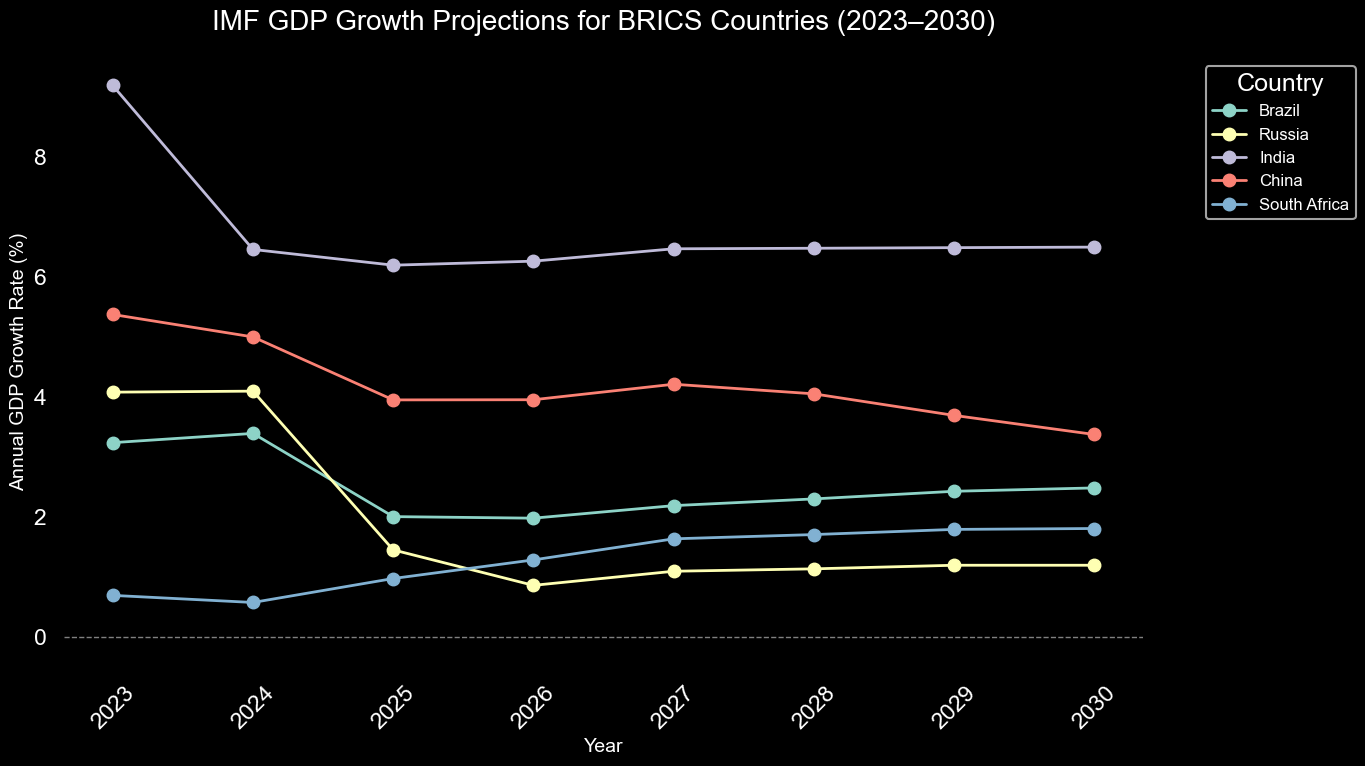

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# BRICS countries
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']

# Filter for BRICS countries and years 2023 and beyond
brics_df = typed_df[
    (typed_df['country'].isin(brics_countries)) & 
    (typed_df['year'] >= 2023)
].copy()

# Ensure 'value' is numeric
brics_df['value'] = pd.to_numeric(brics_df['value'], errors='coerce')

# Use dark background
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each BRICS country's GDP growth projection
for country in brics_countries:
    country_data = brics_df[brics_df['country'] == country]
    ax.plot(country_data['year'], country_data['value'], label=country, marker='o', linestyle='-', linewidth=2)

# Titles and labels
ax.set_title('IMF GDP Growth Projections for BRICS Countries (2023–2030)', fontsize=20, pad=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annual GDP Growth Rate (%)', fontsize=14)

# Customize legend
ax.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)

# Rotate x-ticks
ax.set_xticks(brics_df['year'].unique())
ax.set_xticklabels(brics_df['year'].unique(), rotation=45)

# Remove grid
ax.grid(False)

# Remove all spines (the box-like borders around the plot)
for spine in ax.spines.values():
    spine.set_visible(False)

# Optional: Zero-growth reference line
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


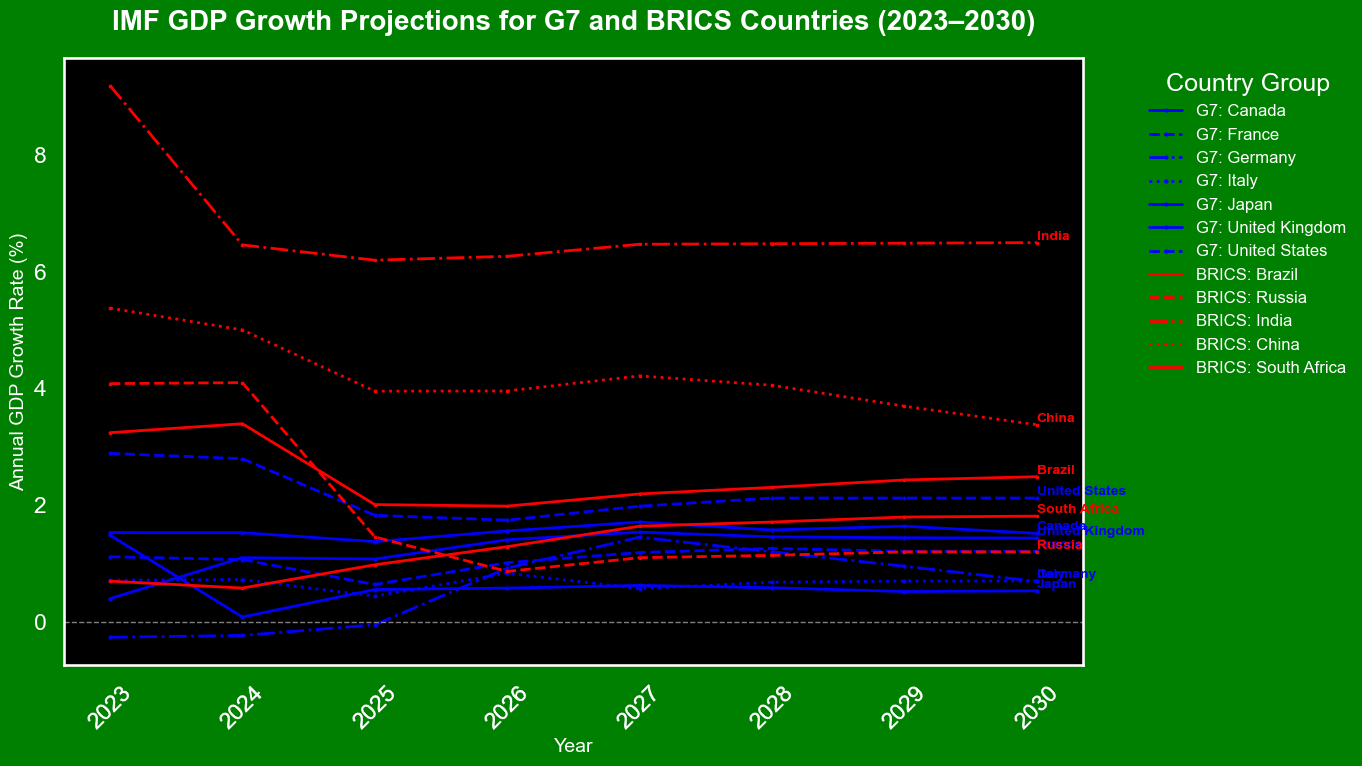

In [182]:

# Set up the plot
plt.figure(figsize=(14, 8))

# Set background color for the plot
plt.gcf().set_facecolor('green')  # Light background for the figure
plt.gca().set_facecolor('black')  # Slightly darker background for the axis

# Define line styles and markers for variety
line_styles_g7 = ['-', '--', '-.', ':', '-']
line_styles_brics = ['-', '--', '-.', ':', '-']

# Plot G7 countries (in blue) with different line styles and markers
for idx, country in enumerate(g7_countries):
    country_data = g7_df[g7_df['country'] == country]
    line = plt.plot(country_data['year'], country_data['value'], label=f'G7: {country}', 
                    marker='o', linestyle=line_styles_g7[idx % len(line_styles_g7)], color='blue', markersize=2, linewidth=2)
    
    # Adding label at the last point of the line
    plt.text(country_data['year'].iloc[-1], country_data['value'].iloc[-1], 
             f'{country}', color='blue', fontsize=10, ha='left', va='bottom', fontweight='bold')

# Plot BRICS countries (in red) with different line styles and markers
for idx, country in enumerate(brics_countries):
    country_data = brics_df[brics_df['country'] == country]
    line = plt.plot(country_data['year'], country_data['value'], label=f'BRICS: {country}', 
                    marker='s', linestyle=line_styles_brics[idx % len(line_styles_brics)], color='red', markersize=2, linewidth=2)
    
    # Adding label at the last point of the line
    plt.text(country_data['year'].iloc[-1], country_data['value'].iloc[-1], 
             f'{country}', color='red', fontsize=10, ha='left', va='bottom', fontweight='bold')

# Titles and labels
plt.title('IMF GDP Growth Projections for G7 and BRICS Countries (2023–2030)', fontsize=20, pad=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual GDP Growth Rate (%)', fontsize=14)

# Customize the legend
plt.legend(title='Country Group', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, frameon=False)

# Rotate x-ticks for better readability
plt.xticks(sorted(g7_df['year'].unique().tolist() + brics_df['year'].unique().tolist()), rotation=45)

# Customize plot appearance
plt.grid(False)  # Disable gridlines
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Zero growth line for reference

# Adjust layout to make space for legend and labels
plt.tight_layout()

# Show the plot
plt.show()


In [183]:
g7_2025

,country,estimates_start_after,year,value
8942,Canada,NaT,2025,1.376
8970,France,NaT,2025,0.641
8974,Germany,NaT,2025,-0.050
8993,Italy,NaT,2025,0.440
8995,Japan,NaT,2025,0.554
9095,United Kingdom,NaT,2025,1.077
9096,United States,NaT,2025,1.826


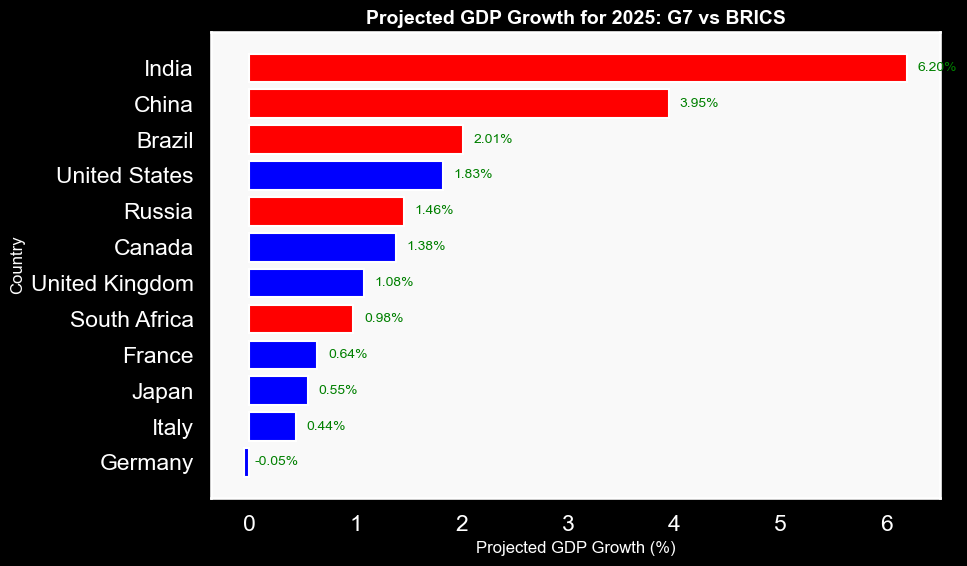

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine G7 and BRICS data for 2025 projection
g7_2025 = g7_df[g7_df['year'] == 2025].copy()
brics_2025 = brics_df[brics_df['year'] == 2025].copy()

# Add group labels
g7_2025['group'] = 'G7'
brics_2025['group'] = 'BRICS'

# Combine for plotting
combined_df = pd.concat([g7_2025, brics_2025])

# Sort by value (optional for better visual order)
combined_df = combined_df.sort_values('value')

# Color map: blue for G7, red for BRICS
colors = combined_df['group'].map({'G7': 'blue', 'BRICS': 'red'})

# Horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(combined_df['country'], combined_df['value'], color=colors)

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%', va='center', fontsize=10, color='green')

# Title and axis labels
plt.title('Projected GDP Growth for 2025: G7 vs BRICS', fontsize=14, fontweight='bold')
plt.xlabel('Projected GDP Growth (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Remove grid and use clean background
plt.grid(False)
plt.gca().set_facecolor('#f9f9f9')

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


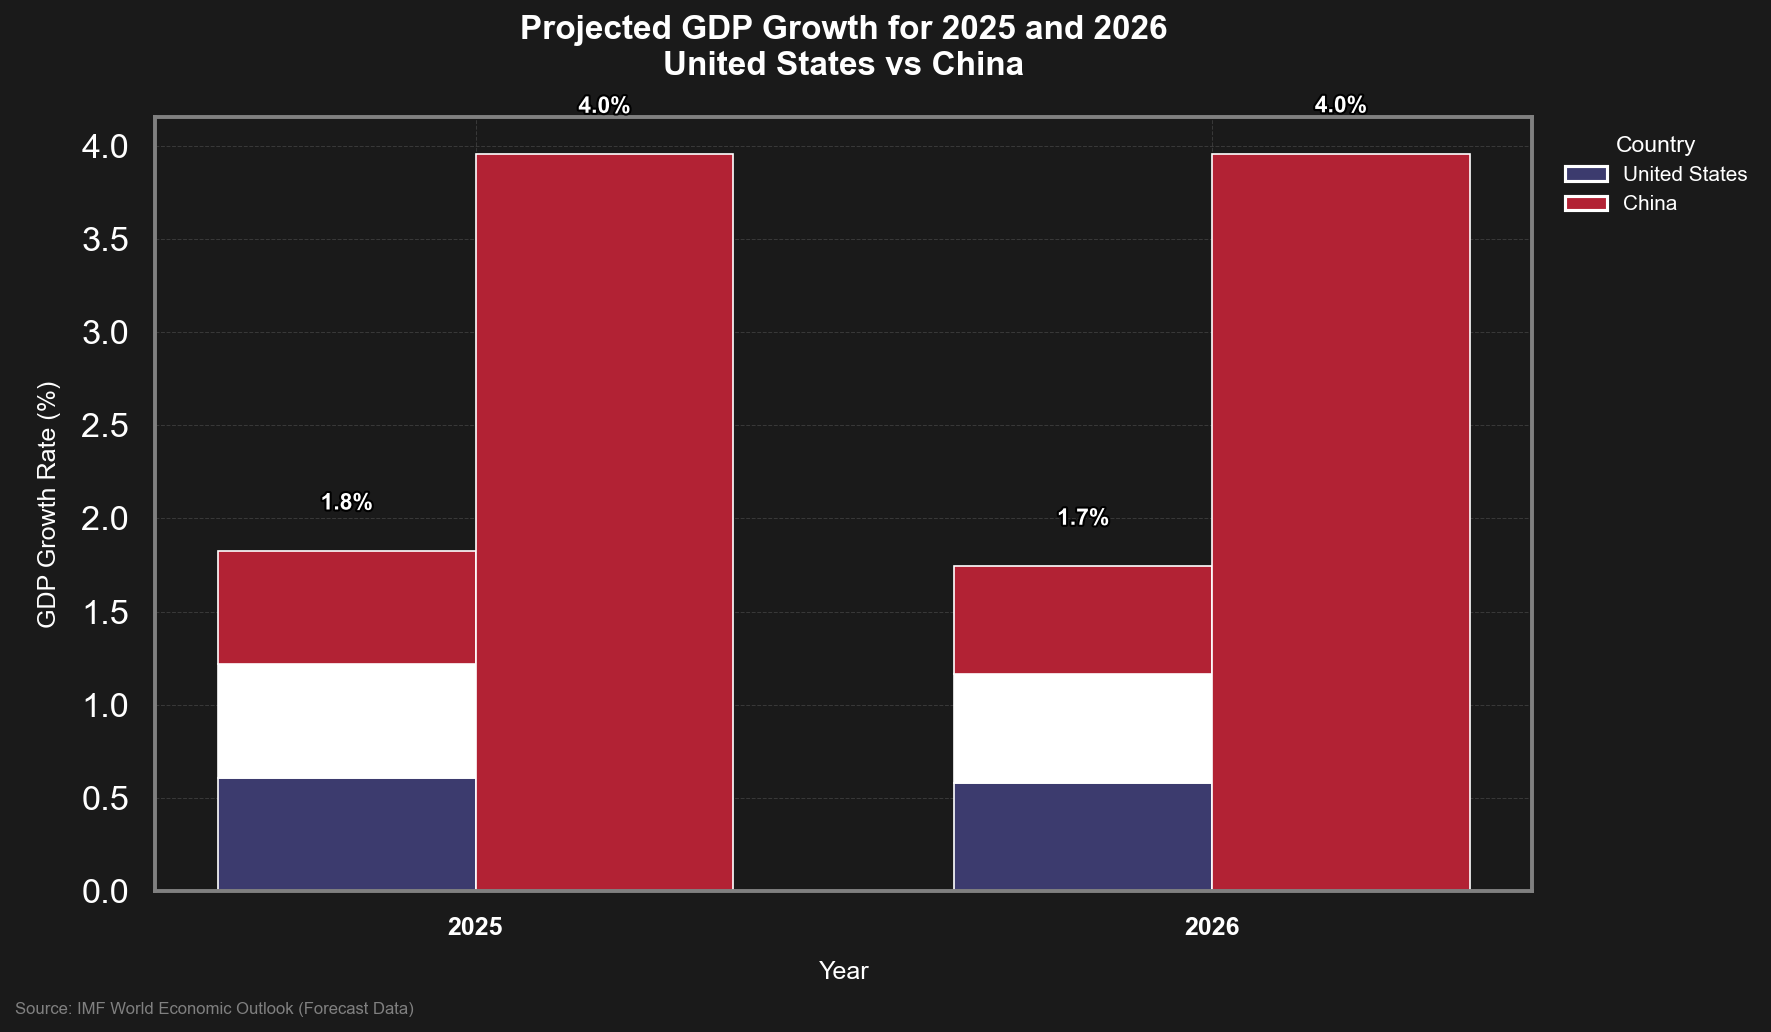

In [186]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# --- Sample structure assumed: df_melted is already loaded ---
# Columns: 'Year', 'Country', 'Value'

# Filter parameters
target_years = [2025, 2026]
countries = ['United States', 'China']

# Filter and copy data
df_filtered = df_melted[
    (df_melted['Country'].isin(countries)) &
    (df_melted['Year'].isin(target_years))
].copy()

# Theme settings
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)
fig.patch.set_facecolor('#1a1a1a')
ax.set_facecolor('#1a1a1a')

# Define X-axis positions
years = sorted(df_filtered['Year'].unique())
x = range(len(years))
bar_width = 0.35

# Offsets to separate countries on the same x tick
offset = {
    'United States': -bar_width / 2,
    'China': bar_width / 2
}

# Colors
us_colors = ['#3C3B6E', '#FFFFFF', '#B22234']  # USA flag: blue, white, red
china_color = '#B22234'  # Gold/yellowish tone for contrast

import matplotlib.patheffects as path_effects  # Move to top of file

# Barplot
for idx, year in enumerate(years):
    for country in countries:
        value = df_filtered.loc[
            (df_filtered['Year'] == year) & (df_filtered['Country'] == country),
            'Value'
        ].values[0]

        xpos = idx + offset[country]

        if country == 'United States':
            segment_height = value / 3
            for i in range(3):
                ax.bar(xpos, segment_height, width=bar_width,
                       bottom=i * segment_height,
                       color=us_colors[i],
                       edgecolor='white',
                       linewidth=0.8)
        else:
            ax.bar(xpos, value, width=bar_width,
                   color=china_color,
                   edgecolor='white',
                   linewidth=0.8)

        # GDP growth label
        ax.text(
            xpos, value + 0.2,
            f'{value:.1f}%',
            ha='center', va='bottom',
            fontsize=11,
            weight='semibold',
            color='white',
            path_effects=[path_effects.withStroke(linewidth=2, foreground="black")]
        )

# Axis formatting
ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12, color='white', weight='bold')
ax.set_ylabel('GDP Growth Rate (%)', fontsize=12, color='white', labelpad=10)
ax.set_xlabel('Year', fontsize=12, color='white', labelpad=10)

# Title and subtitle
ax.set_title(
    'Projected GDP Growth for 2025 and 2026\nUnited States vs China',
    fontsize=16, weight='bold', color='white', pad=20
)

# Custom legend
legend_elements = [
    Patch(facecolor=us_colors[0], edgecolor='white', label='United States'),
    Patch(facecolor=china_color, edgecolor='white', label='China')
]
ax.legend(
    handles=legend_elements,
    frameon=False,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1.01, 1),
    title='Country',
    title_fontsize=11
)

# Grid and spines
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
for spine in ax.spines.values():
    spine.set_color('gray')

# Caption / source
fig.text(0.01, 0.01, 'Source: IMF World Economic Outlook (Forecast Data)', fontsize=8, color='gray')

# Save and show
plt.tight_layout()
plt.savefig('gdp_growth_us_china_pro.jpg', dpi=300, facecolor=fig.get_facecolor(), bbox_inches='tight')
plt.show()


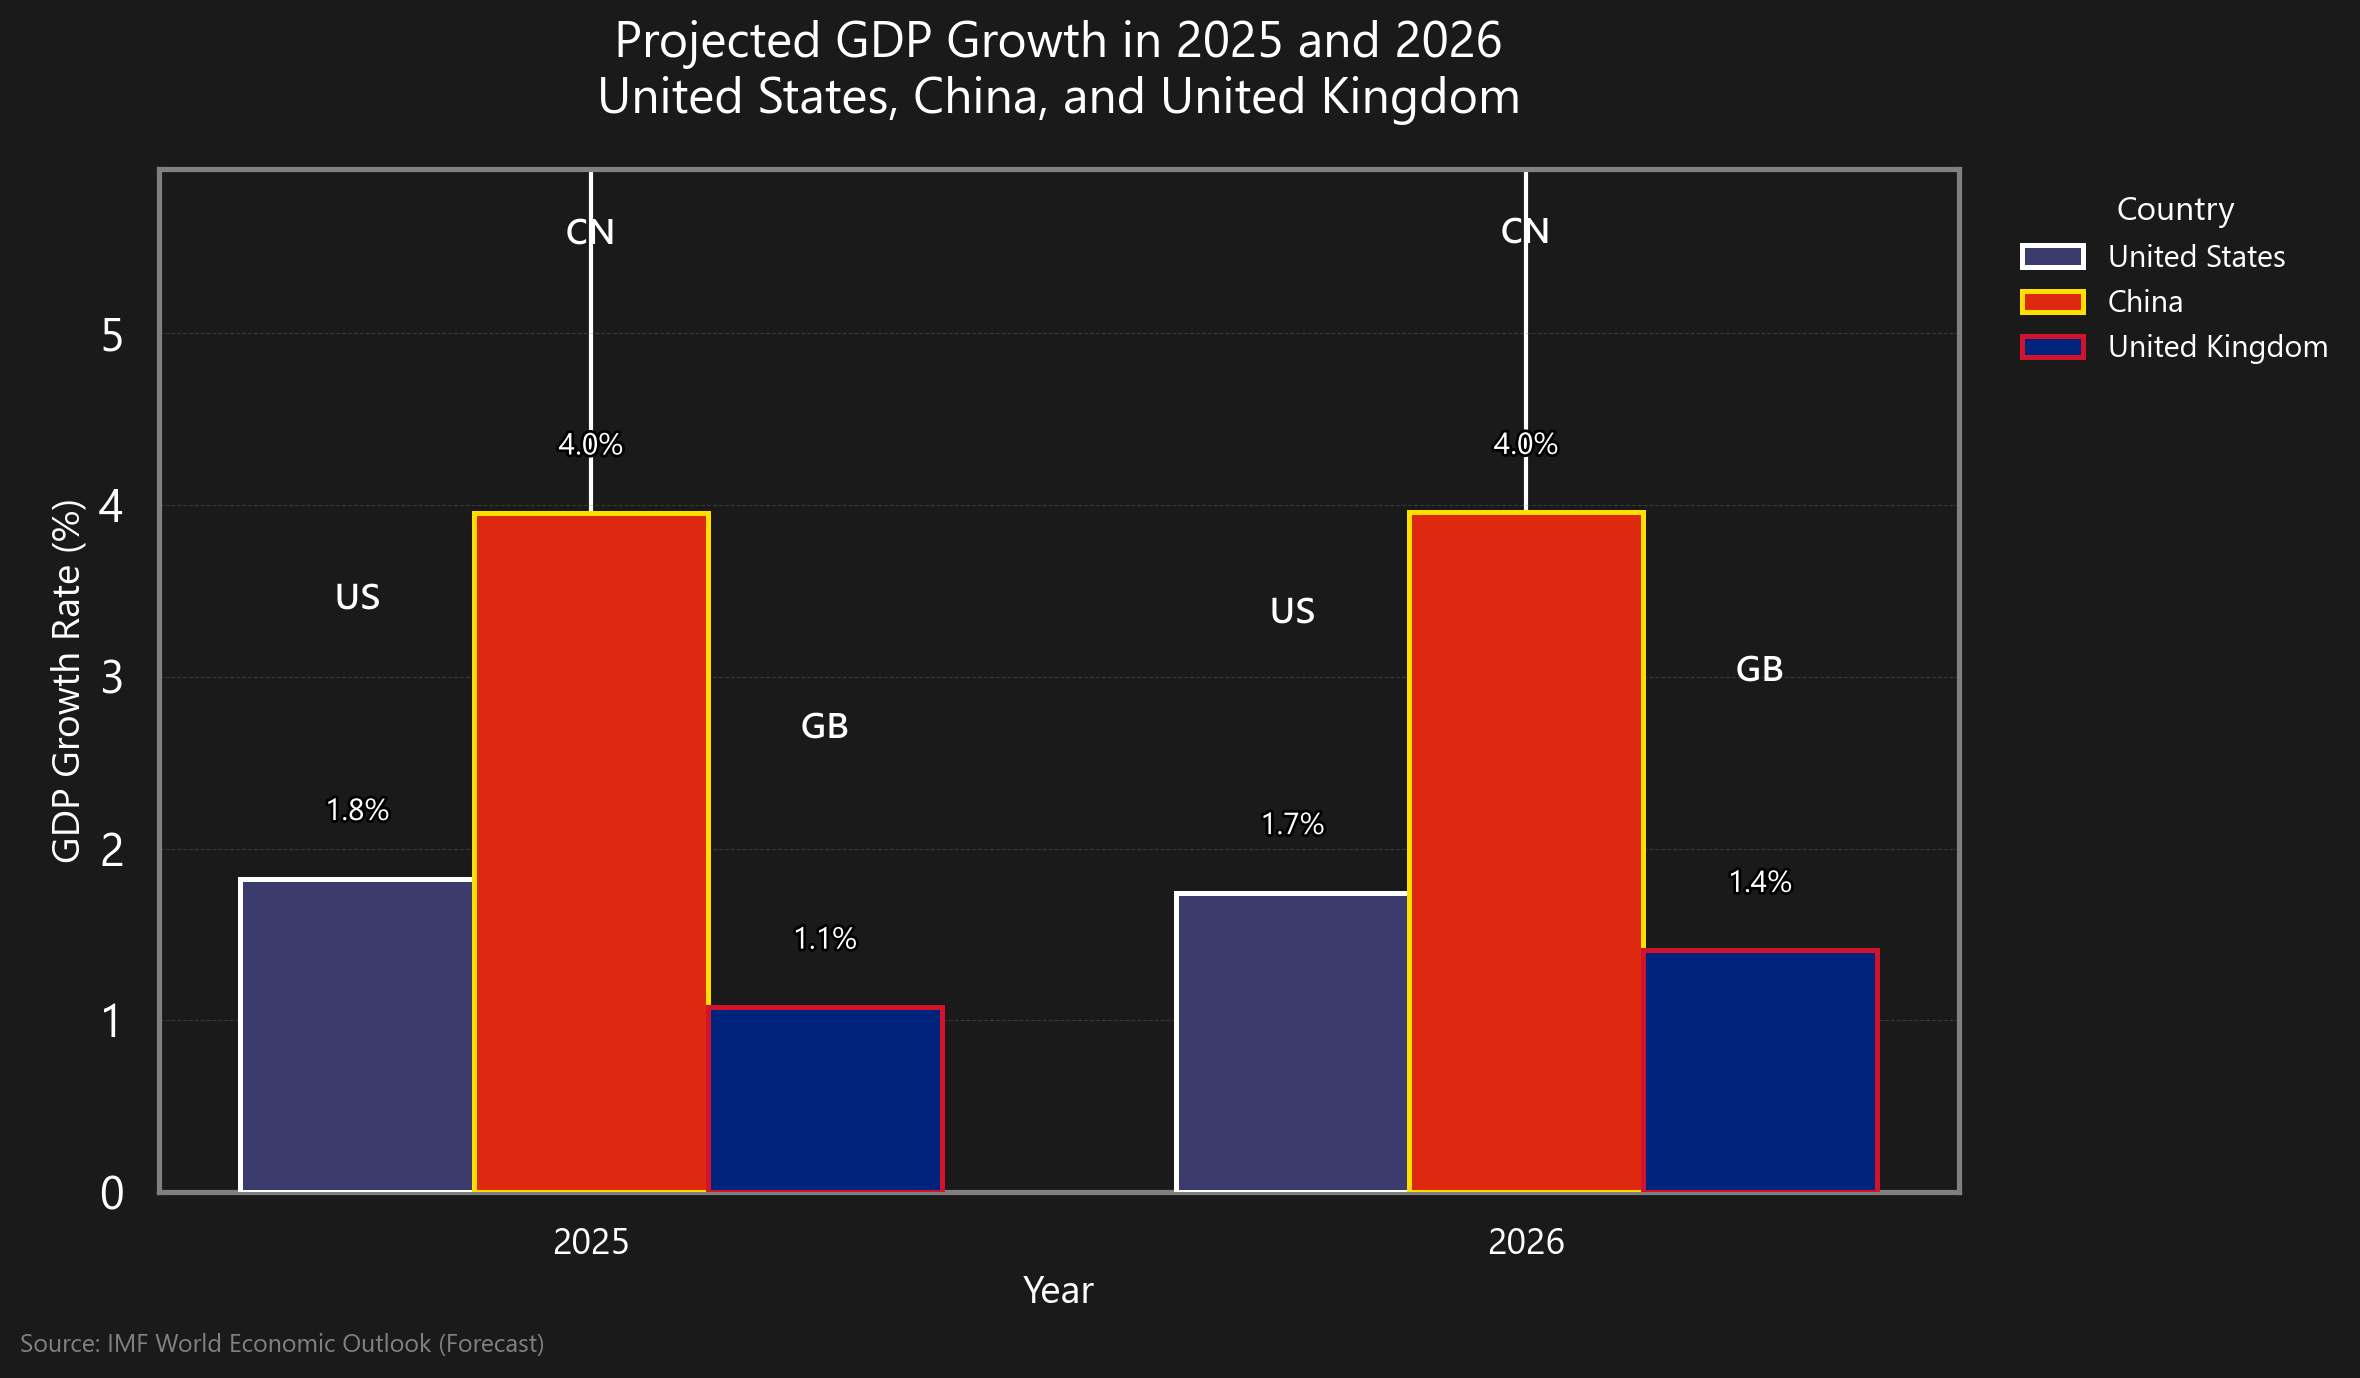

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patheffects as path_effects

# Filter data
target_years = [2025, 2026]
countries = ['United States', 'China', 'United Kingdom']
df_filtered = df_melted[
    (df_melted['Country'].isin(countries)) &
    (df_filtered['Year'].isin(target_years))
]

# Define colors for each country based on flag themes
flag_colors = {
    'United States': '#3C3B6E',     # Navy blue (stars)
    'China': '#DE2910',             # Red (main flag color)
    'United Kingdom': '#00247D'     # Blue (Union Jack base)
}
highlight_colors = {
    'United States': '#FFFFFF',     # White (stripes)
    'China': '#FFDE00',             # Yellow (stars)
    'United Kingdom': '#CF142B'     # Red (crosses)
}

# Country flag emojis
flag_emojis = {
    'United States': '🇺🇸',
    'China': '🇨🇳',
    'United Kingdom': '🇬🇧'
}

# Plot settings
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
fig.patch.set_facecolor('#1a1a1a')
ax.set_facecolor('#1a1a1a')

# Prepare bar positions
years = sorted(df_filtered['Year'].unique())
bar_width = 0.25
x_positions = np.arange(len(years))

# Offset for each country
offsets = {
    'United States': -bar_width,
    'China': 0,
    'United Kingdom': bar_width
}

# Draw bars manually
for i, country in enumerate(countries):
    for j, year in enumerate(years):
        value = df_filtered[
            (df_filtered['Country'] == country) &
            (df_filtered['Year'] == year)
        ]['Value'].values
        if len(value) == 0:
            continue
        val = value[0]
        xpos = x_positions[j] + offsets[country]

        # Draw main bar
        bar = ax.bar(
            xpos,
            val,
            width=bar_width,
            color=flag_colors[country],
            edgecolor=highlight_colors[country],
            linewidth=1.8,
            label=country if j == 0 else "",  # Avoid duplicate labels
            zorder=3
        )

        # Annotate bar with text
        ax.text(
            xpos,
            val + 0.3,
            f'{val:.1f}%',
            ha='center',
            va='bottom',
            fontsize=11,
            color='white',
            weight='bold',
            path_effects=[path_effects.withStroke(linewidth=2, foreground='black')]
        )

        # Place the flag emoji above the bar
        ax.text(
            xpos,
            val + 1.5,  # Position the emoji slightly above the bar
            flag_emojis[country],  # Use flag emoji
            ha='center',
            va='bottom',
            fontsize=18,  # Adjust size of the emoji
            color='white',
            weight='bold'
        )

# Set labels
ax.set_xticks(x_positions)
ax.set_xticklabels(years, fontsize=13, color='white')
ax.set_ylabel('GDP Growth Rate (%)', fontsize=14, color='white')
ax.set_xlabel('Year', fontsize=14, color='white')
ax.set_title(
    'Projected GDP Growth in 2025 and 2026\nUnited States, China, and United Kingdom',
    fontsize=18, weight='bold', color='white', pad=20
)
ax.set_ylim(0, df_filtered['Value'].max() + 2)

# Legend
ax.legend(
    title='Country',
    title_fontsize=12,
    fontsize=11,
    frameon=False,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    labelcolor='white'
)

# Grid and aesthetics
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.4, alpha=0.3)
for spine in ax.spines.values():
    spine.set_color('gray')

# Caption
fig.text(0.01, 0.01, 'Source: IMF World Economic Outlook (Forecast)', fontsize=9, color='gray')

# Save and show
plt.tight_layout()
plt.savefig('gdp_growth_lags.png', dpi=300, facecolor=fig.get_facecolor(), bbox_inches='tight')
plt.show()
